# This notebook is prepared by Vasilii Sitdikov as a solution for assignment

#### Week 4
### Course: Cluster Analysis in Data Mining
### Specialization: Data Mining
###  University of Illinois MCS in Data Science (Coursera)

## Description
##### In this assignment, you will be implementing two clustering validation measures: Normalized Mutual Information (NMI) and Jaccard similarity.

### Input
You will be given one ground-truth clustering (partition) results and five clustering test cases. You need to evaluate the clustering test cases with regard to the ground-truth by NMI and Jaccard measures and submit your measures. You will be graded based on whether your measures are correct.

The ground-truth clustering (partition) results are stored in file "partitions.txt"; the five clustering result test cases are stored in file "clustering_1.txt", ..., "clustering_5.txt".

### Output
Each clustering result (both ground-truth and test cases) is represented by a file. Each line in a file consists of two integers, separated by a space. The first integer represents the id of a data item, and the second integer represents the id of the cluster which this item belongs to.

You need to submit a file titled "scores.txt" consisting of 5 lines. Each line contains two float numbers separated by a space. The first number of the i-th line represents the NMI measure you calculated for the i-th test case i (i.e. "clustering_i.txt") with regard to the ground-truth given in "partitions.txt", and the second number of the i-th line represents the Jaccard measure you calculated for the i-th test case.

### Important Tips
As an example, a valid submission may look like:

0.1000000 0.2000000

0.3000000 0.4000000

0.5000000 0.6000000

0.7000000 0.8000000

0.9000000 1.0000000

You will be graded based on whether your file format is correct and onhow many measures you submitted are correct.

# Solution

## I. Loading and parsing the files

#### Install library for work with enviroment (we need to get the txt file)

In [44]:
!pip install ibm-cos-sdk

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


#### Getting credentials

In [45]:
# The code was removed by Watson Studio for sharing.

#### Import libraries and define functions for getting the text from enviroment

In [46]:
import ibm_boto3
from botocore.client import Config

In [47]:
cos = ibm_boto3.client('s3',
                       ibm_api_key_id=credentials_1['IBM_API_KEY_ID'],
                       ibm_service_instance_id=credentials_1['IAM_SERVICE_ID'],
                       ibm_auth_endpoint=credentials_1['IBM_AUTH_ENDPOINT'],
                       config=Config(signature_version='oauth'),
                       endpoint_url=credentials_1['ENDPOINT'])

In [48]:
def get_file(filename):
    '''Retrieve file from Cloud Object Storage'''
    fileobject = cos.get_object(Bucket=credentials_1['BUCKET'], Key=filename)['Body']
    return fileobject

In [49]:
def load_string(fileobject):
    '''Load the file contents into a Python string'''
    text = fileobject.read()
    return text

#### Parsing the text file to the 2D list "data". 5 rows for "clustering_" files and the last one for "partitions.txt" 

In [50]:
data = []
for i in range(1, 7):    
    
    if i == 6:
        file_name = 'partitions.txt'
    else:
        file_name = 'clustering_'+str(i)+'.txt'
    
    # Getting the file as a stream object and decoding to the string
    file = get_file(file_name)
    text = load_string(file).decode()
    
    # Parsing the text file to the 2D list "data", using only clusters numbers (the second number in each line)
    data_new=[]
    for num, line in enumerate(text.splitlines()):
        data_new.append(str(line).split(' ')[1])
    data.append(data_new)

#### Loading data to Numpy Array

In [51]:
import numpy as np

In [86]:
array = np.array(data).astype(int) #It's crucial to transform data type to int from str
print(array.shape)
array

(6, 300)


array([[2, 0, 2, ..., 2, 2, 2],
       [2, 0, 1, ..., 2, 2, 2],
       [2, 0, 1, ..., 0, 1, 2],
       [2, 0, 2, ..., 2, 2, 2],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 2, ..., 2, 2, 2]])

 ## II. Clustering

#### Import libraries

In [61]:
from sklearn.metrics import normalized_mutual_info_score as NMI
from sklearn.metrics import jaccard_similarity_score as Jaccard

#### My Jaccard
!!!The result of sklearn library is not the same as the result of my function, wich uses the definition from the lecture

In [98]:
def my_jaccard(array_true, array_ev):
    FP=0; FN=0; TP=0
    for i in range(len(array_true)):
        for j in range(len(array_true)):
            if i!=j:
                if array_true[i] == array_true[j] and array_ev[i] == array_ev[j]:
                    TP += 1
                elif array_true[i] != array_true[j] and array_ev[i] == array_ev[j]:
                    FP +=1
                elif array_true[i] == array_true[j] and array_ev[i] != array_ev[j]:
                    FN +=1
    return TP/(TP+FN+FP)

#### Applying validation methods

In [99]:
output = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
for k in range(0, 5):
    output[0][k] = NMI(array[5], array[k])
    output[1][k] = my_jaccard(array[5], array[k])
#    output[2][k] = Jaccard(array[5], array[k]) !!!The results of sklearn library is not the same to results of my function, wich uses the definition from the lecture
output    

[[0.88962476658005873,
  0.64563681134772166,
  0.39154374638169198,
  0.76778916069026093,
  0.76117025972228858],
 [0.9116889804325438,
  0.6794842795747569,
  0.46493045279668543,
  0.8005979461848434,
  0.5975855130784709]]

## III. Write output to file

#### Create the loop to write down output to the txt file in required format

In [100]:
with open('scores.txt', 'w') as file:
    # Loop df: extract number of row and cluster labels 
    for i in range (0, 5):
        string = str(output[0][i]) +' '+ str(output[1][i])
        file.write(string + '\r\n')

In [101]:
with open('scores.txt', 'r') as file:
    print(file.read())

0.88962476658 0.9116889804325438
0.645636811348 0.6794842795747569
0.391543746382 0.46493045279668543
0.76778916069 0.8005979461848434
0.761170259722 0.5975855130784709



#### Upload file to the Cloud Object Storage

In [102]:
resource = ibm_boto3.resource('s3',
                   ibm_api_key_id=credentials_1['IBM_API_KEY_ID'],
                   ibm_service_instance_id=credentials_1['IAM_SERVICE_ID'],
                   ibm_auth_endpoint=credentials_1['IBM_AUTH_ENDPOINT'],
                   config=Config(signature_version='oauth'),
                   endpoint_url=credentials_1['ENDPOINT'])
resource.Bucket(name=credentials_1['BUCKET']).put_object(Key='scores.txt', Body=open('scores.txt', 'rb'))

s3.Object(bucket_name='assignmentfrequentitemsetminingus-donotdelete-pr-bsxgb7luqmjbzs', key='scores.txt')

## IV. Optional. Vizualisation

In [103]:
from matplotlib import pyplot as plt
%matplotlib inline 

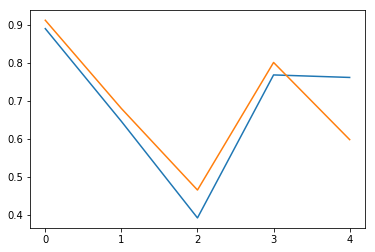

In [104]:
plt.plot(output[0])
plt.plot(output[1])
plt.xticks(range(0, 5))
plt.show()